In [1]:
# Copyright (c) 2020 ETH Zurich, Xiaying Wang, Michael Hersche, Batuhan Toemekce, 
# Burak Kaya, Michele Magno, and Luca Benini

In [3]:
%matplotlib inline
import matplotlib as plt
import matplotlib.pyplot as plt
plt.rc('axes', axisbelow=True)
import numpy as np
import os


## Plot Training and Validation Accuracy for Global Model

In [4]:
# plot global model results 
def plot_global(path,num_classes,n_ds,n_ch,T,plot_avg=True,plot_folds=True,color='black'):
    
    
    all_acc = np.zeros((5,4,100))
    for split_ctr in range(5):
        file = '{:}/stats/global_class_{:}_ds{:}_nch{:}_T{}_split_{:}.csv'.format(path,num_classes,n_ds,n_ch,T,split_ctr)
        all_acc[split_ctr] = np.genfromtxt(file, delimiter=' ').transpose()
    
    epochs = np.arange(100)
    if plot_folds: 
        handles = plt.plot(epochs, [[a*100 for a in b] for b in all_acc[:,0].transpose()], ':')
        plt.gca().set_prop_cycle(None)
        handles = plt.plot(epochs, [[a*100 for a in b] for b in all_acc[:,1].transpose()], '-')
    
    if plot_avg:
        plt.plot(epochs,100*all_acc[:,0].mean(axis=0),linestyle = ':',linewidth=3,color=color,label = 'Train {:}'.format(n_ch))
        plt.plot(epochs,100*all_acc[:,1].mean(axis=0),linestyle = '-',linewidth=3,color=color, label = 'Val {:}'.format(n_ch))
    
    plt.legend()
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy [%]")
    
    # print avg accuracy
    print("Global Model {:}-class MI, {:} channels: Train:\t{:.2f}% Val:\t{:.2f}%".format(
        num_classes,n_ch,100*all_acc[:,0,-1].mean(),100*all_acc[:,1,-1].mean()))
    
    return 100*all_acc[:,1,-1].mean()
        

## Compute Accuracy for Subject-specific Transfer Learning

In [17]:
# plot global model results 
def plot_ss(path,num_classes,n_ds,n_ch,T,fl,color='black'):
    
    all_subjects = range(1,110)
    excluded_subjects=[88,92,100,104]
    subjects = [x for x in all_subjects if (x not in excluded_subjects)]
    n_sub = len(subjects)
    n_epoch = 10
    n_fold = 4
    n_res = 4 # both validation and training accuracy and loss
    all_acc = np.zeros((n_sub,n_fold,n_res,n_epoch+1)) 
    all_acc[:]= np.nan
    
    for sub_idx in range(n_sub):
        sub_number = subjects[sub_idx]
        for split_ctr in range(4): 
            file = '{:}/stats/ss_class_{:}_ds{:}_nch{:}_T{:}_fl{:}_sub{:03d}_split_{:}.csv'.format(
                path,num_classes,n_ds,n_ch,T,fl,sub_number,split_ctr)
            
            if os.path.isfile(file):
                all_acc[sub_idx,split_ctr] = np.genfromtxt(file, delimiter=' ').transpose()
            #np.savetxt(file, all_acc[sub_idx,split_ctr])
    
    global_acc = 100*np.nanmean(all_acc[:,1,1,0])
    ss_acc = 100*np.nanmean(all_acc[:,1,1,-1])

    print("Global Model {:}-class MI, {:} channels: Global:\t{:.2f} SS:\t{:.2f}% Increase:\t{:.2f}%".format(
        num_classes,n_ch,global_acc,ss_acc,ss_acc-global_acc))
    # plot training curve 
    epochs = np.arange(n_epoch+1)
    
    plt.plot(epochs,100*np.nanmean(all_acc[:,:,0],axis=(0,1)),linestyle = ':',linewidth=3,color=color,label = 'Train {:}'.format(fl))
    plt.plot(epochs,100*np.nanmean(all_acc[:,:,1],axis=(0,1)),linestyle = '-',linewidth=3,color =color,label = 'Val {:}'.format(fl))
    plt.legend()
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy [%]")
    
    return ss_acc
    
    

Global Model 3-class MI, 64 channels: Global:	76.61 SS:	80.77% Increase:	4.17%


/usr/pack/python-3.4.4-kgf/lib/python3.4/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


Global Model 3-class MI, 64 channels: Global:	76.55 SS:	78.57% Increase:	2.02%


/usr/pack/python-3.4.4-kgf/lib/python3.4/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


Global Model 3-class MI, 64 channels: Global:	76.67 SS:	77.68% Increase:	1.01%


/usr/pack/python-3.4.4-kgf/lib/python3.4/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


Global Model 3-class MI, 64 channels: Global:	76.49 SS:	77.86% Increase:	1.37%


/usr/pack/python-3.4.4-kgf/lib/python3.4/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


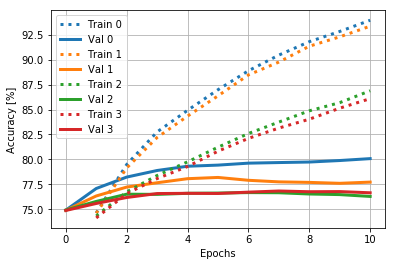

In [23]:
# just center (C)
experiment_name = 'ss_freezlayer'
result_path = '../results/'+experiment_name
n_ds = 1
T = 3
num_classes = 3
num_level_list=[0,1,2,3]
nch = 64

for fl in num_level_list: 
    _= plot_ss(result_path,num_classes,n_ds,nch,T,fl,
                                       color='C'+str(fl))
    
plt.grid()